In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Excel file
df = pd.read_excel('/content/plm_approvals.xlsx')


def check_df(dataframe, head=5):
    print("############################ Info #############################")
    print(dataframe.info())
    print("\n############################ Shape ############################")
    print(dataframe.shape)
    print("\n############################ Types ############################")
    print(dataframe.dtypes)
    print("\n############################ Head #############################")
    print(dataframe.head(head))
    print("\n############################ Tail #############################")
    print(dataframe.tail(head))
    print("\n##################### Missing Values (NA) #####################")
    print(dataframe.isnull().sum())
    print("\n########################## Quantiles ##########################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print("\n######################## Unique Values ########################")
    print(dataframe.nunique())

check_df(df)

############################ Info #############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Complexity     200 non-null    int64 
 1   Change_Type    200 non-null    object
 2   Department     200 non-null    object
 3   Requested_By   200 non-null    object
 4   Approval_Days  200 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 7.9+ KB
None

############################ Shape ############################
(200, 5)

############################ Types ############################
Complexity        int64
Change_Type      object
Department       object
Requested_By     object
Approval_Days     int64
dtype: object

############################ Head #############################
   Complexity Change_Type   Department Requested_By  Approval_Days
0           7       Minor  Engineering        UserE             19
1   

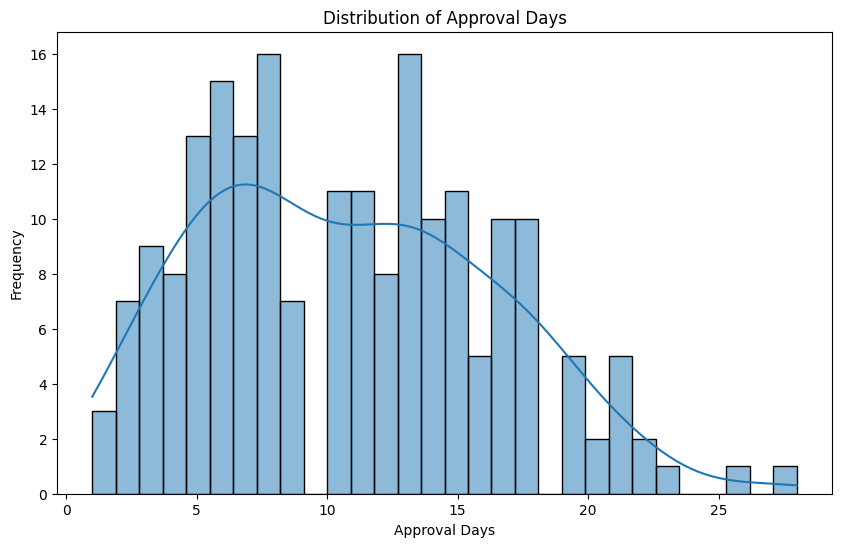

In [22]:
# Distribution of Approval_Days
plt.figure(figsize=(10, 6))
sns.histplot(df['Approval_Days'], bins=30, kde=True)
plt.title('Distribution of Approval Days')
plt.xlabel('Approval Days')
plt.ylabel('Frequency')
plt.show()

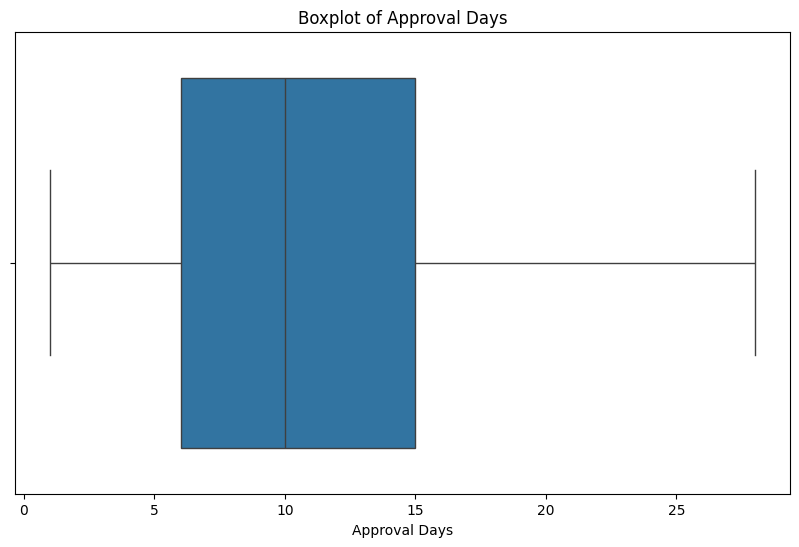

In [23]:
# Boxplot to check for outliers in Approval_Days
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Approval_Days'])
plt.title('Boxplot of Approval Days')
plt.xlabel('Approval Days')
plt.show()

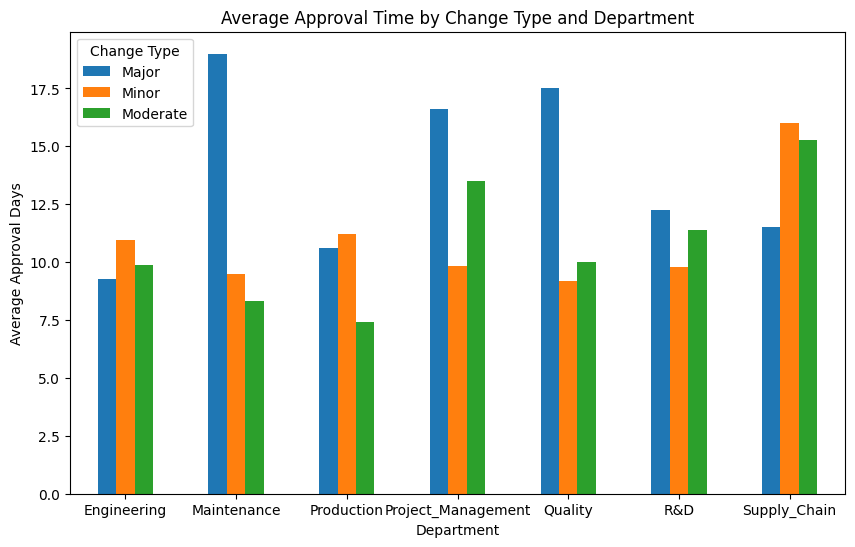

In [24]:
# Average Approval Time by Change Type and Department
avg_approval = df.groupby(['Department', 'Change_Type'])['Approval_Days'].mean().unstack()
avg_approval.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Department')
plt.ylabel('Average Approval Days')
plt.title('Average Approval Time by Change Type and Department')
plt.xticks(rotation=0)
_ = plt.legend(title='Change Type')

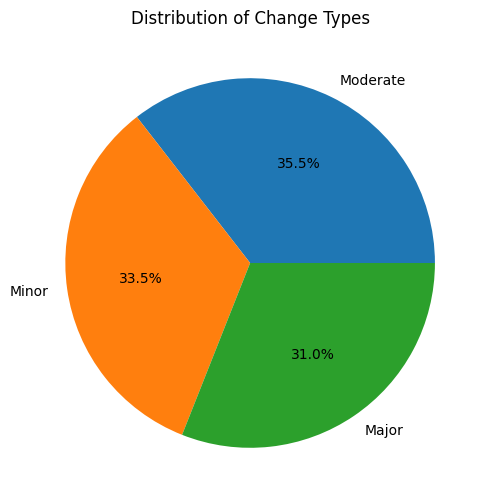

In [25]:
# Distribution of Change Types
plt.figure(figsize=(6, 6))
df['Change_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
_ = plt.title('Distribution of Change Types')

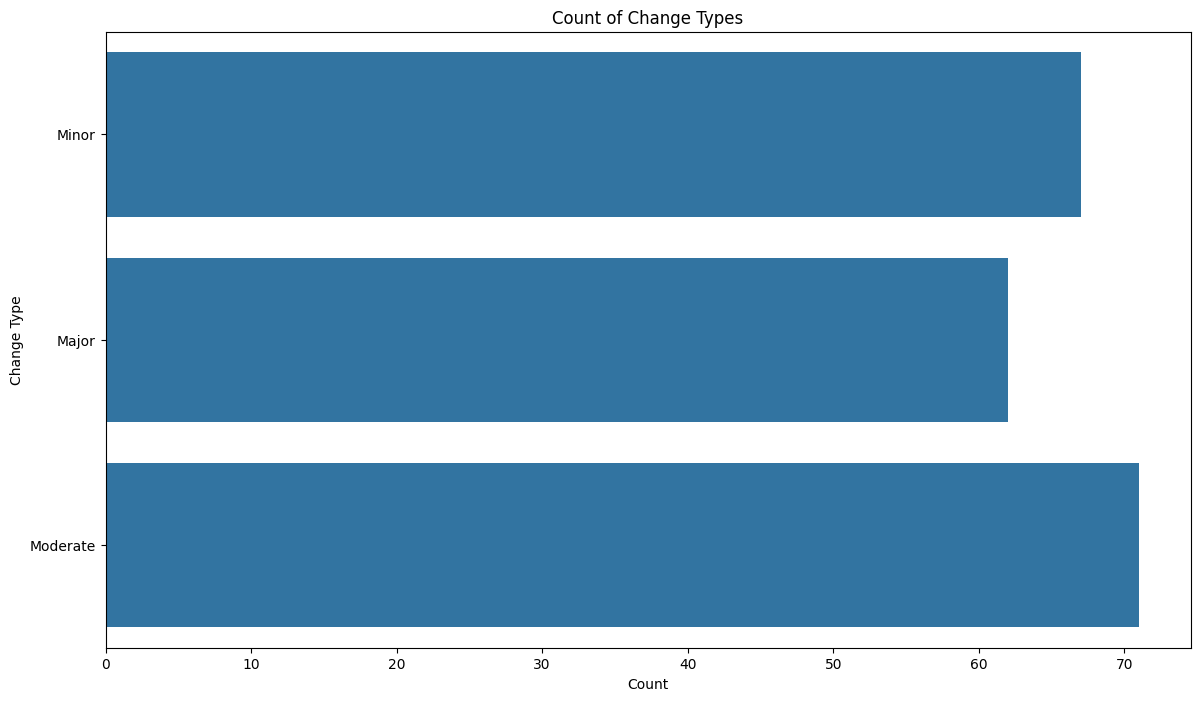

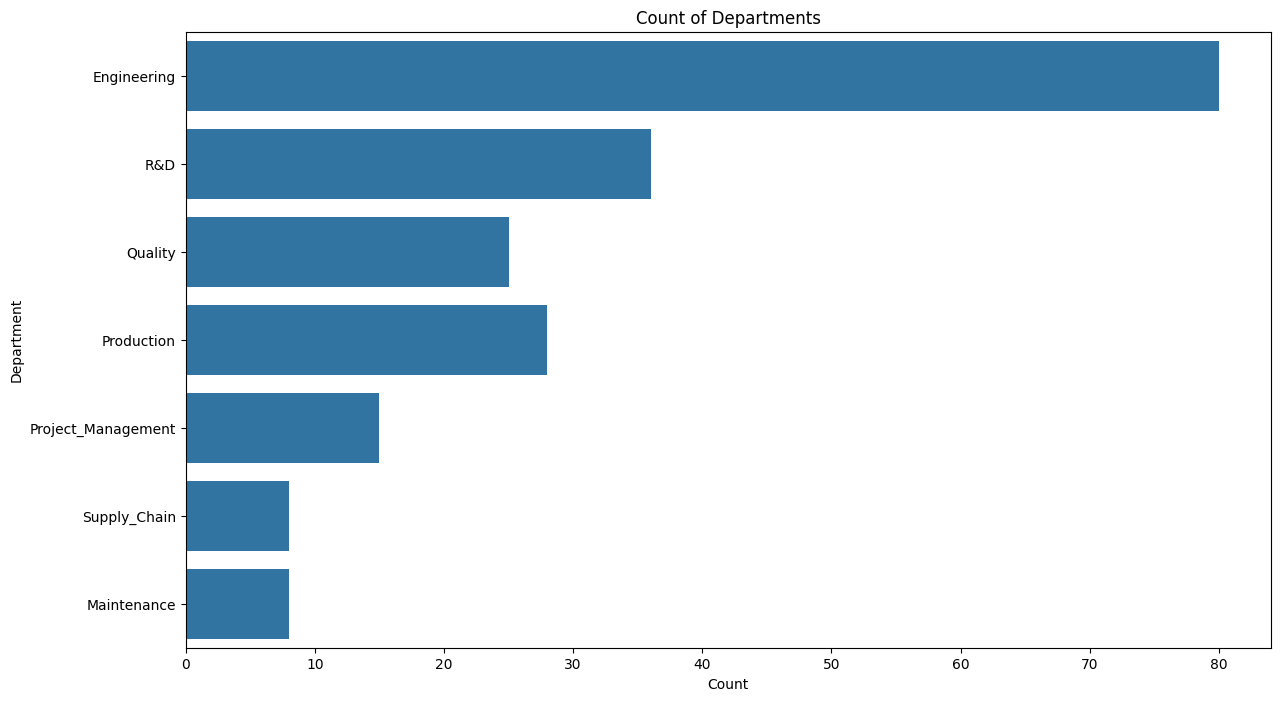

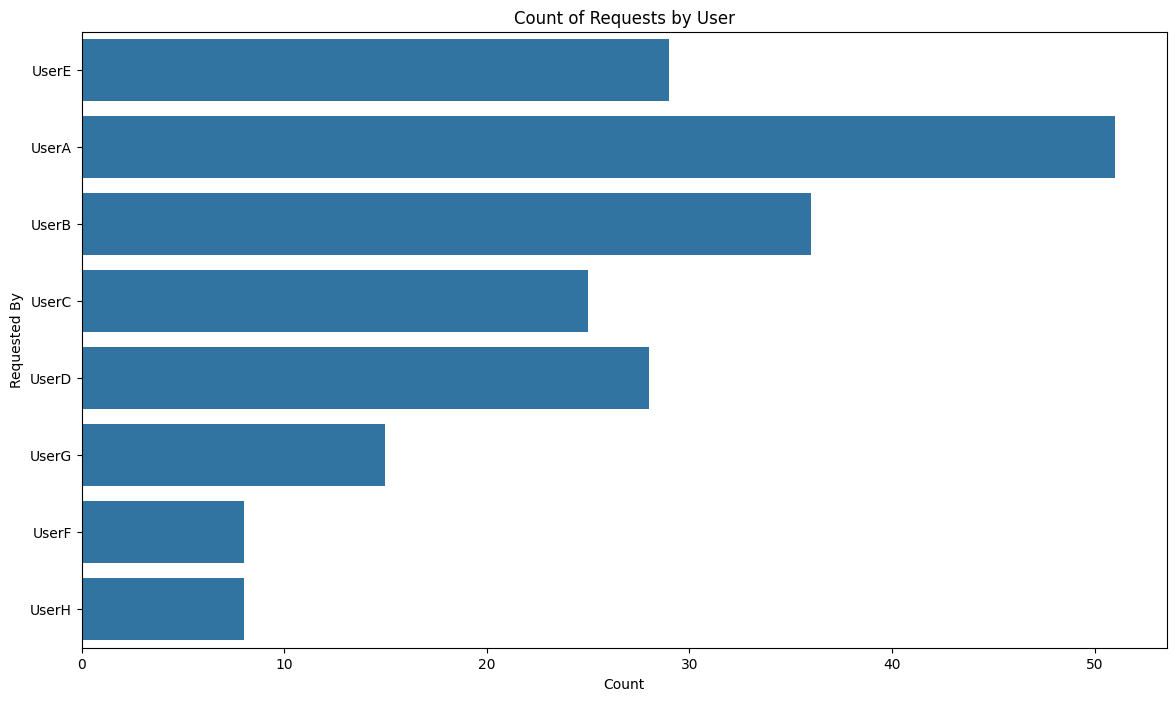

In [26]:
# Count plot for categorical variables
plt.figure(figsize=(14, 8))
sns.countplot(y='Change_Type', data=df)
plt.title('Count of Change Types')
plt.xlabel('Count')
plt.ylabel('Change Type')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(y='Department', data=df)
plt.title('Count of Departments')
plt.xlabel('Count')
plt.ylabel('Department')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(y='Requested_By', data=df)
plt.title('Count of Requests by User')
plt.xlabel('Count')
plt.ylabel('Requested By')
plt.show()

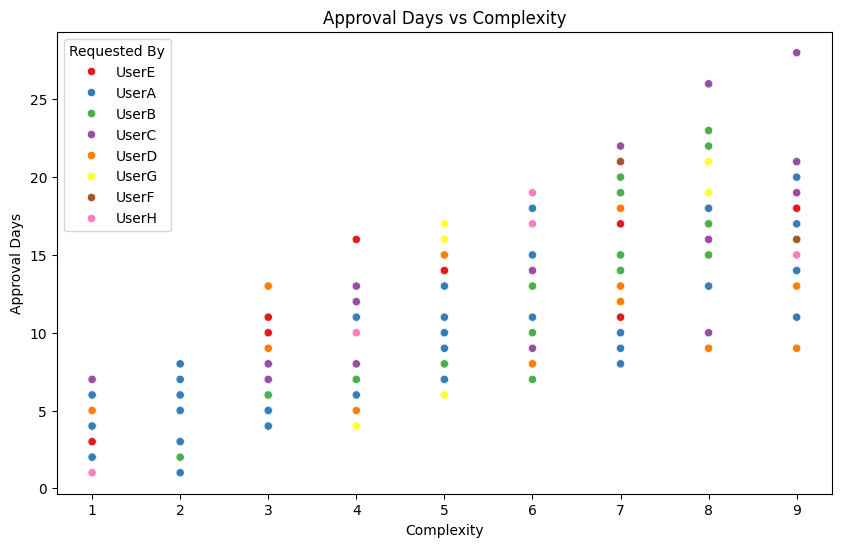

In [44]:
# Scatter plot to visualize the relationship between Approval_Days and Complexity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Complexity', y='Approval_Days', hue='Requested_By', data=df, palette='Set1')
plt.title('Approval Days vs Complexity')
plt.xlabel('Complexity')
plt.ylabel('Approval Days')
plt.legend(title='Requested By')
plt.show()

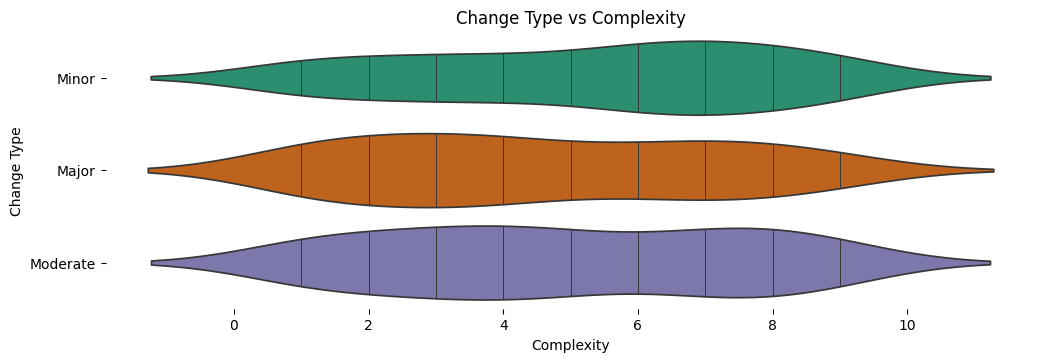

In [31]:
# Change_Type vs Complexity
figsize = (12, 1.2 * len(df['Change_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data=df, x='Complexity', y='Change_Type', hue='Change_Type', inner='stick', palette='Dark2', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Change Type vs Complexity')
plt.xlabel('Complexity')
plt.ylabel('Change Type')
#plt.legend(title='Change Type')
plt.show()

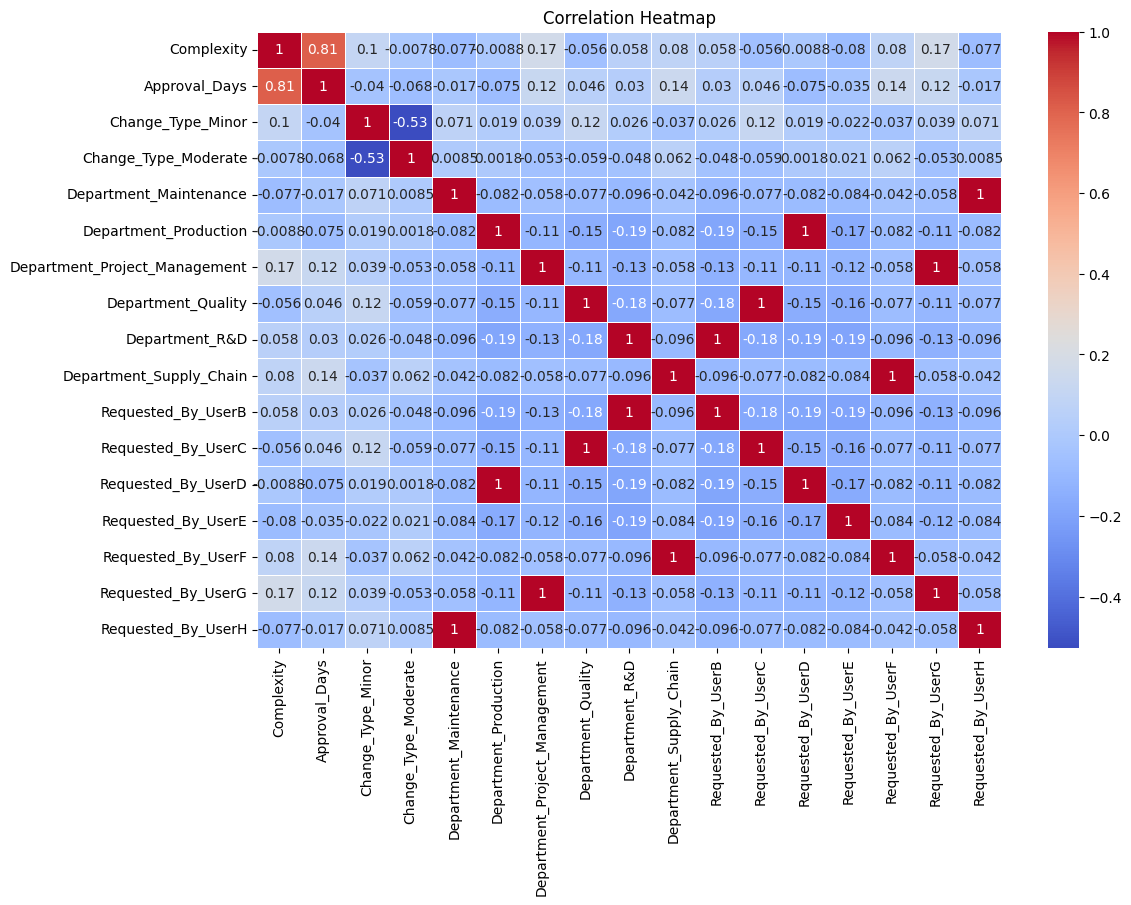

In [32]:
# Converting categorical variables to numeric values using one-hot encoding
df_one_hot = pd.get_dummies(df, drop_first=True)

# Heatmap to show correlation between numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_one_hot.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

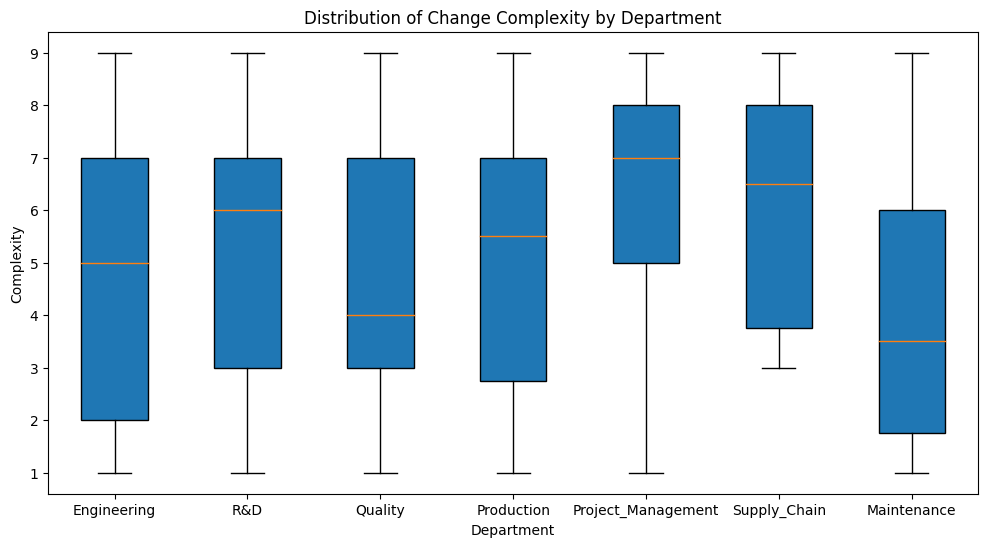

In [33]:
# Distribution of Change Complexity by Department
plt.figure(figsize=(12, 6))
plt.boxplot([df[df['Department'] == dept]['Complexity'] for dept in df['Department'].unique()],
            labels=df['Department'].unique(), patch_artist=True)
plt.xlabel('Department')
plt.ylabel('Complexity')
_ = plt.title('Distribution of Change Complexity by Department')

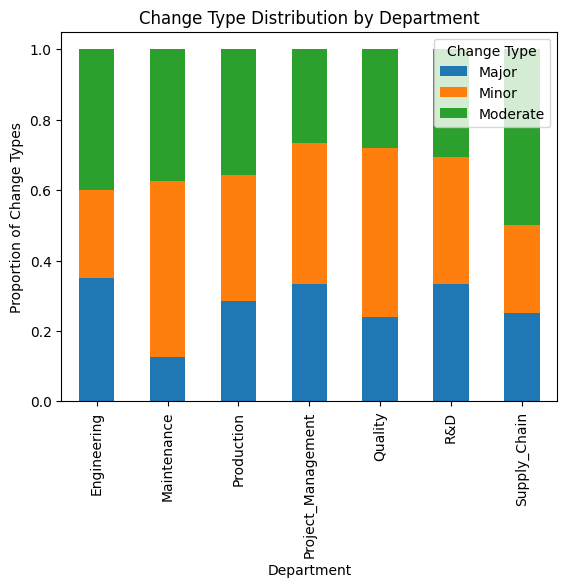

In [34]:
# Change Type Distribution by Department
df.groupby('Department')['Change_Type'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.xlabel('Department')
plt.ylabel('Proportion of Change Types')
plt.title('Change Type Distribution by Department')
_ = plt.legend(title='Change Type')

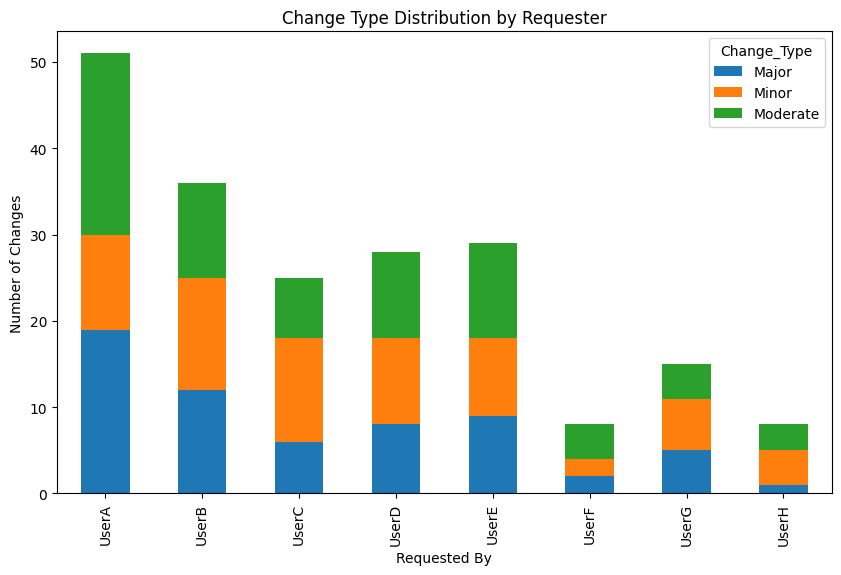

In [35]:
# Change Type Distribution by Requester

change_type_counts = df.groupby(['Requested_By', 'Change_Type'])['Change_Type'].count().unstack()
change_type_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Requested By')
plt.ylabel('Number of Changes')
_ = plt.title('Change Type Distribution by Requester')

In [37]:
# Filtering data where Approval Days > 18 and Complexity > 7
filtered_df = df[(df['Approval_Days'] > 18) & (df['Complexity'] > 7)]

# Display the filtered data and sort for Approval_days
ascending_df = filtered_df.sort_values(by='Approval_Days', ascending=False)
print(ascending_df)

     Complexity Change_Type          Department Requested_By  Approval_Days
107           9       Major             Quality        UserC             28
10            8       Major             Quality        UserC             26
44            8       Minor                 R&D        UserB             23
148           8    Moderate                 R&D        UserB             22
61            9    Moderate         Engineering        UserA             21
76            8       Major  Project_Management        UserG             21
87            9       Minor             Quality        UserC             21
138           9       Major         Engineering        UserA             20
59            8    Moderate  Project_Management        UserG             19
180           9       Minor             Quality        UserC             19


In [43]:
# Grouping data by Change Type and calculating mean Approval_Days
grouped_by_change_type = df.groupby('Change_Type')['Approval_Days'].mean().sort_values(ascending=False)
print(grouped_by_change_type)

Change_Type
Major       11.645161
Minor       10.402985
Moderate    10.211268
Name: Approval_Days, dtype: float64


In [42]:
# Grouping data by Department and calculating mean Approval_Days
grouped_by_department = df.groupby('Department')['Approval_Days'].mean().sort_values(ascending=False)
print(grouped_by_department)

Department
Supply_Chain          14.500000
Project_Management    13.066667
Quality               11.400000
R&D                   11.083333
Maintenance           10.250000
Engineering            9.937500
Production             9.678571
Name: Approval_Days, dtype: float64


In [41]:
# Grouping data by Requested By and calculating mean Approval_Days
grouped_by_requested_by = df.groupby('Requested_By')['Approval_Days'].mean().sort_values(ascending=False)
print(grouped_by_requested_by)

Requested_By
UserF    14.500000
UserG    13.066667
UserC    11.400000
UserB    11.083333
UserH    10.250000
UserE    10.241379
UserA     9.764706
UserD     9.678571
Name: Approval_Days, dtype: float64
